<a href="https://colab.research.google.com/github/Pestrdan/netology_research/blob/main/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B/TSML_14_HW6_%D0%A1%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B5_%D0%BC%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B5_%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

# **1. Скачайте текст произведения «Война и мир»: ссылка на GitHub и Google Drive.**
# **2. Очистите его, оставив только русские буквы и символы пробела.**

In [ ]:
with open('tom_1.txt', 'r') as f:
    text_1 = f.read().lower()
text_1 = re.sub('[^а-я ]','', text_1)
len(text_1)

648866

In [ ]:
with open('tom_2.txt', 'r') as f:
    text_2 = f.read().lower()
text_2 = re.sub('[^а-я ]','', text_2)
len(text_2)

703492

In [ ]:
with open('tom_3.txt', 'r') as f:
    text_3 = f.read().lower()
text_3 = re.sub('[^а-я ]','', text_3)
len(text_3)

757521

In [ ]:
with open('tom_4.txt', 'r') as f:
    text_4 = f.read().lower()
text_4 = re.sub('[^а-я ]','', text_4)
len(text_4)

653547

In [ ]:
text = text_1 + text_2 + text_3 + text_4

In [ ]:
len(text) == (len(text_1) + len(text_2) + len(text_3) + len(text_4))

True

# **3. Постройте матрицу переходных вероятностей.**

In [ ]:
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [ ]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [ ]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [ ]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

<ipython-input-11-dc1e1f362eff>:1: RuntimeWarning: invalid value encountered in divide
  probabilities = (probabilities / probabilities.sum(axis=1)[:, None])


In [ ]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

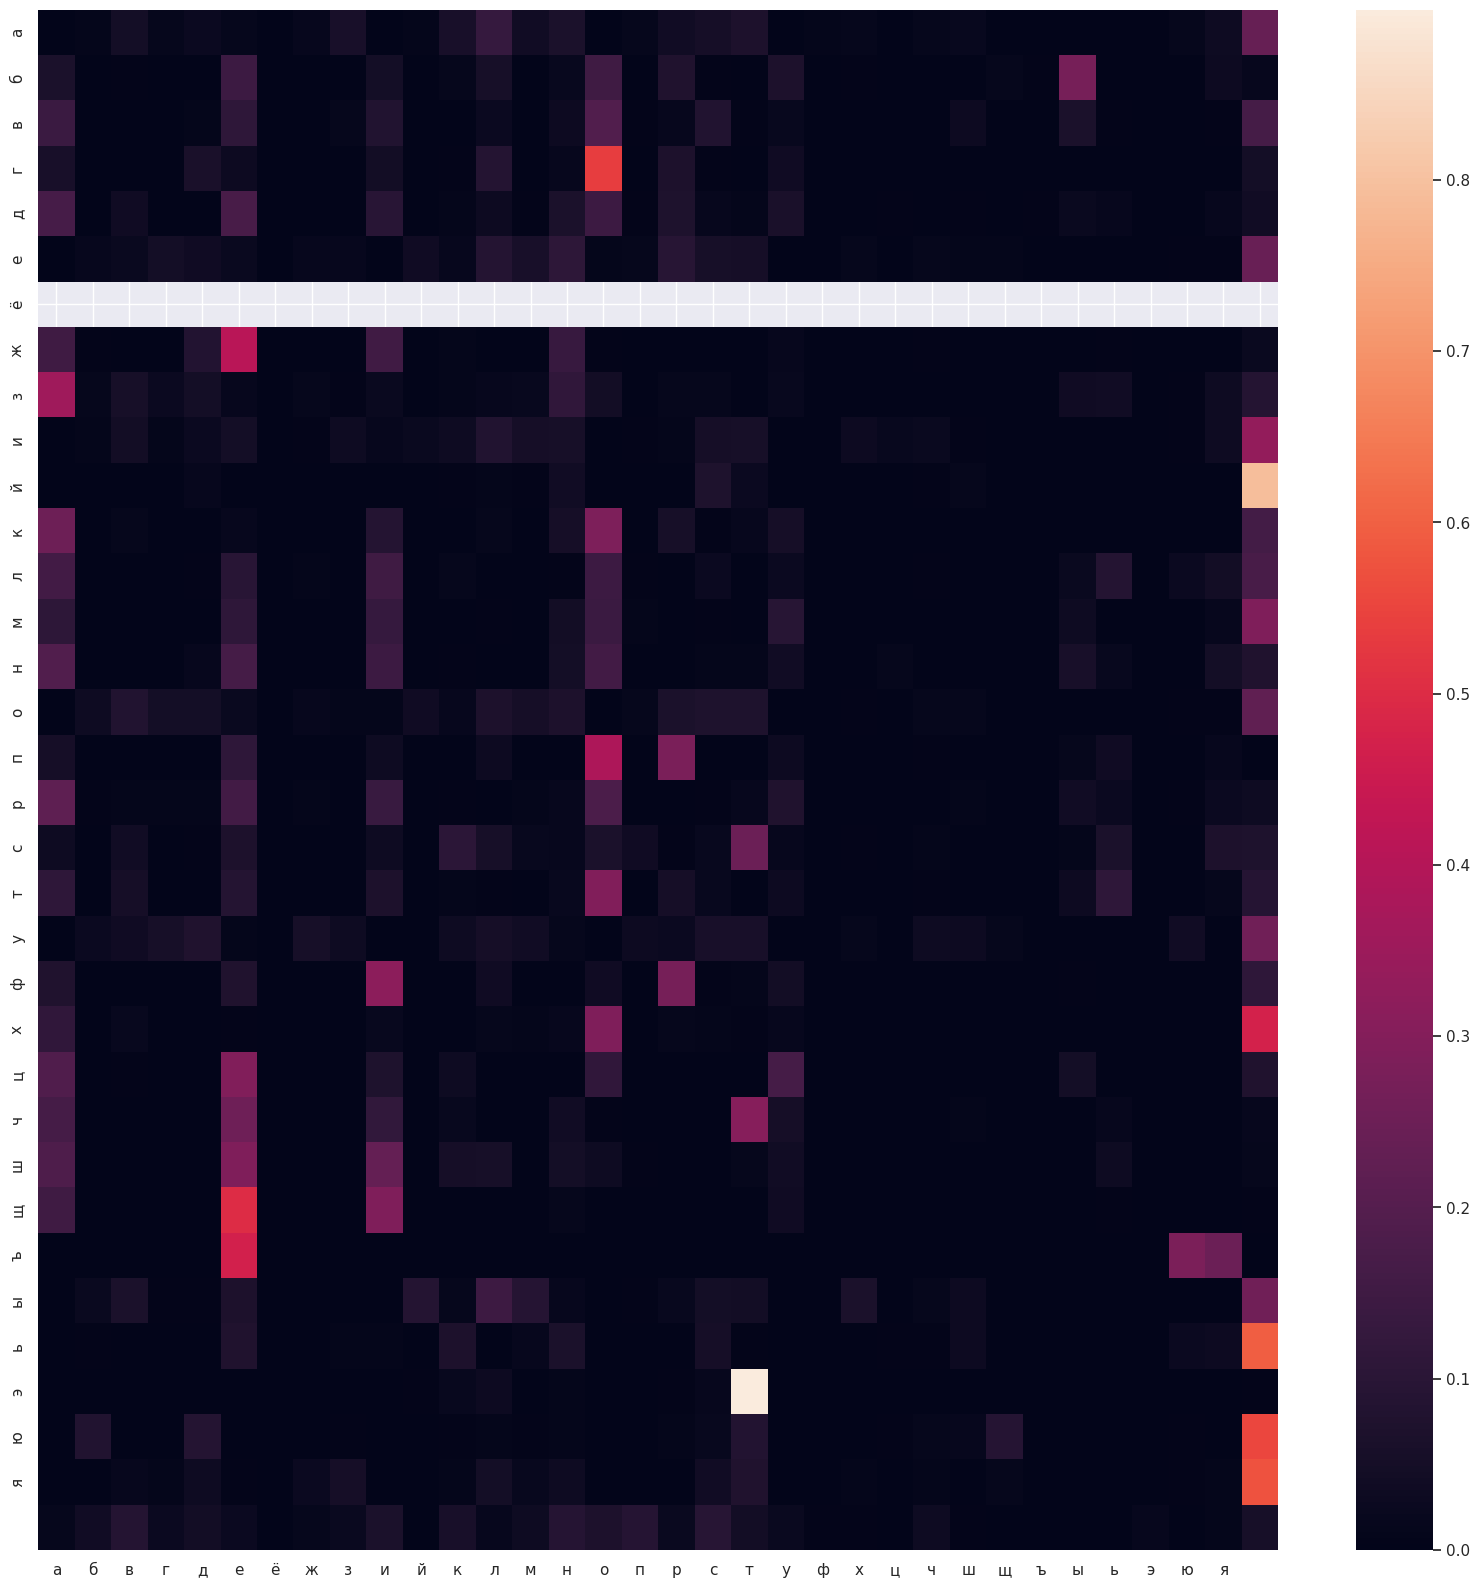

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df)
plt.show()

# **4. Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».**

In [ ]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
for c in RUSSIAN:
  for i in RUSSIAN:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[i]] * probabilities[POS[i], end]
    if proba > 0:
      print(''.join(['п', c, i, 'р']), proba)

паар 1.2483021244621608e-08
пабр 1.0155553856672825e-06
павр 1.15917977686471e-06
пагр 1.2848114697473956e-06
падр 2.942105165838902e-06
паер 1.9503146628298786e-06
пажр 7.311949848239609e-09
пазр 1.2095790878783555e-06
паир 2.547790864803073e-08
пайр 2.7599678947720997e-08
пакр 4.840852058790128e-06
палр 3.3611556905914123e-09
памр 1.0930948458598652e-07
панр 1.161326477180596e-07
паор 4.339681014540716e-08
папр 5.626388035700382e-06
парр 2.870279020272537e-08
паср 5.043304580053417e-07
патр 5.531903526415092e-06
паур 6.923602698965342e-08
пафр 3.17685218286211e-06
пахр 2.440818119506081e-07
пачр 2.6506060145138035e-08
пашр 5.266004634220631e-09
пащр 4.5451641687422465e-09
паэр 3.402682747656317e-10
паюр 1.6147067665876867e-07
паяр 1.4938299828069804e-07
па р 8.697598650738777e-06
пвар 2.806393138584855e-09
пвбр 1.5943951085774744e-11
пввр 8.160012706997085e-12
пвгр 3.321084346893555e-11
пвдр 2.685575343020761e-10
пвер 5.0598785244545456e-09
пвжр 3.909391636356634e-15
пвзр 8.485947199

# **5. Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.**

In [ ]:
s = []
start = 'б'
s.append(start)
length = 7
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

быхажити


# **6. Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.**

In [ ]:
series = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")['Count']
#series = np.array(series)

In [ ]:
!pip install hmmlearn

In [ ]:
from hmmlearn.hmm import GaussianHMM

In [ ]:
values = series.values.reshape(-1,1)

In [ ]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -516.1188153076023
2 -487.4643039143332
3 -465.47277861588105
4 -474.31297827486304


5 -458.2051748105196
6 -447.04206262115116
7 -454.2095742675381
8 -430.6451515475836


9 -436.0345080454111
10 -429.7960548279911
11 -424.1012057203444


12 -411.4010148882218
13 -415.7073260958547


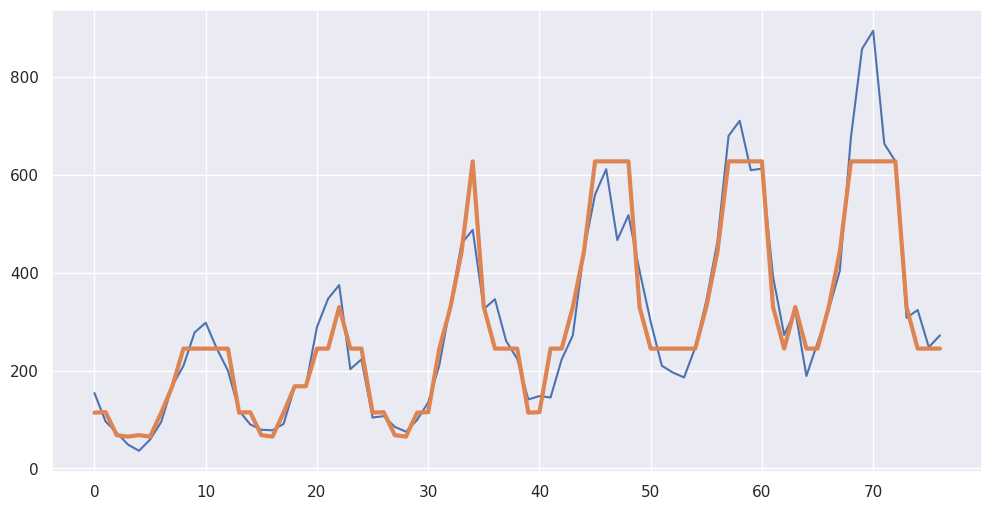

In [ ]:
model = GaussianHMM(n_components=9,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

# **7. Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.**

In [ ]:
def predict(series, N, n_pred):
    new_series = series.copy()
    for _ in range(n_pred):
        new_series = np.append(new_series, means.mean())
        new_series = new_series.reshape(-1,1)
    return new_series

In [ ]:
series_pred = predict(means, 7, 50)

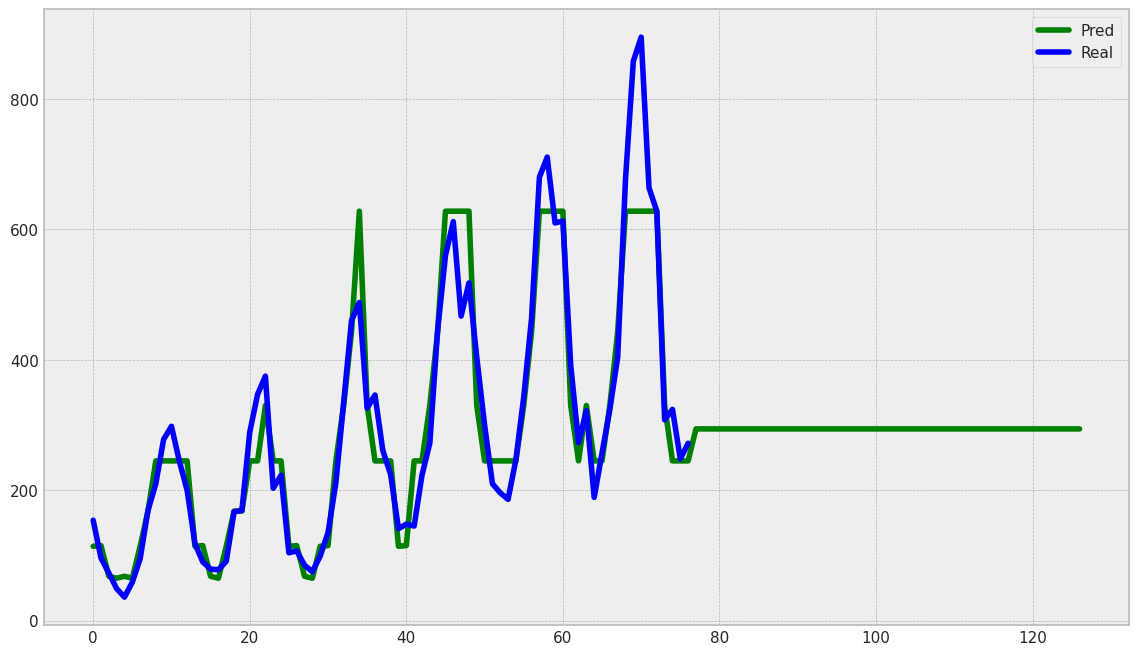

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_pred, color='green', linewidth='4', label='Pred')
    plt.plot(series, color='blue', linewidth='4', label='Real')
    plt.legend()